Importing panda module as the name of 'pd' for data processing activities by its libraries

In [ ]:
import pandas as pd

Loading the data and separating the labels from the training features

In [ ]:
df=pd.read_csv('covtype.csv')
X = df.iloc[:, :-1]
y = df['Cover_Type']

print(X)
print(y)

        Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0            2596      51      3                               258   
1            2590      56      2                               212   
2            2804     139      9                               268   
3            2785     155     18                               242   
4            2595      45      2                               153   
...           ...     ...    ...                               ...   
581007       2396     153     20                                85   
581008       2391     152     19                                67   
581009       2386     159     17                                60   
581010       2384     170     15                                60   
581011       2383     165     13                                60   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                    0                              510   
1        

Shuffling the data and dividing it to training and test ones with a 70:30 ratio

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, train_size=0.7, test_size=0.3, random_state=100)

evaluating preproccessing requirement by checking availability of null or missing data and also categorial ones which Machine learning models can't work with and handle them

In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

more precise and apparent calculation and preview of the number of missing values in each column ,if it is available, by chaining of the .isnull() and .sum() methods

In [19]:
print(df.isnull().sum())

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


preparing the cross-validation procedure by spliting the data to 5 folds

In [20]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5) 

creating a decision tree model by fitting it on data

In [33]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=100)
model_1 = DT.fit(X_train, y_train)
predictions_DT = model_1.predict(X_test)

Accuracy, precision, recall, and F1 score are all metrics used to evaluate the performance of a classification model.

Accuracy measures how often the model makes correct predictions out of all predictions made or in formula form:
(True Positive + True Negative) / (Total Sample Size)

Precision measures how many of the positive predictions made by the model are actually correct or in formula form:
True Positive / (True Positive + False Positive).

Recall or sensitivity measures how many of the actual positive cases were correctly predicted by the model or in formula form:
True Positive / (True Positive + False Negative)

F1 score is a metric that takes into account both precision and recall and is defined as follows: 
F1 Score becomes 1 only when precision and recall are both 1.
F1 score becomes high only when both precision and recall are high. 
actually, F1 score is the harmonic mean of precision and recall and is a better measure than accuracy when we are challenging with imbalanced classes and there is a serious downside to predicting false negatives.
it is formulated as follows:  2 * (Precision * Recall) / (Precision + Recall)

evaluating decision tree model and reporting its performance

    model evaluation metrics

In [34]:
from sklearn import metrics
print("Accuracy_DT:",  metrics.accuracy_score(y_test, predictions_DT),
      "precision_DT:", metrics.precision_score(y_test, predictions_DT, average=None),
      "recall_DT:",    metrics.recall_score(y_test, predictions_DT, average=None),
      "f1_score_DT",   metrics.f1_score(y_test, predictions_DT, average=None)
     )

Accuracy_DT: 0.933799568569855 precision_DT: [0.93359073 0.94350063 0.926731   0.83596598 0.81978177 0.86908881
 0.9344527 ] recall_DT: [0.93216579 0.94488828 0.92215178 0.83495146 0.81776685 0.86775432
 0.94067934] f1_score_DT [0.93287772 0.94419395 0.92443572 0.83545841 0.81877307 0.86842105
 0.93755568]


Confusion matrix is a predictive analytics tool which display a table that compares actual values with the model’s predicted values. Within the context of machine learning, it is utilized as a metric to analyze how a machine learning classifier performed on a dataset. Actually, it shows that from all predicted measures for each class of the data, how many of them match with the true primary ones. In the displayed polts, according to the color which was selected, here from dark blue to light one to green to yellow, the cell which has the highest measure gets the highest-ranked color and others follow it.

    model confusion matrix

confusion_matrix_DT [[59241  3894     1     0    58     5   353]
 [ 3813 80307   240     2   407   170    52]
 [    6   240  9891   104    31   454     0]
 [    0     0    98   688     0    38     0]
 [   59   425    20     0  2329    14     1]
 [   17   206   423    29    14  4521     0]
 [  319    44     0     0     2     0  5788]]


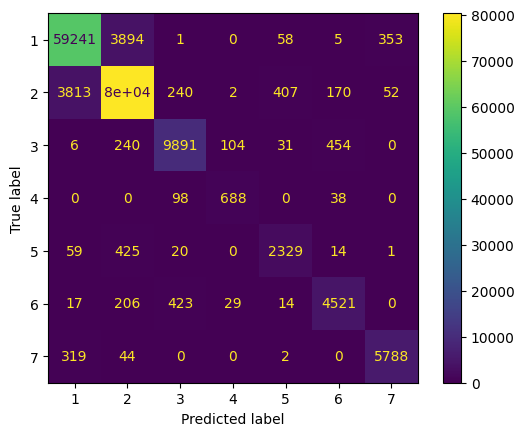

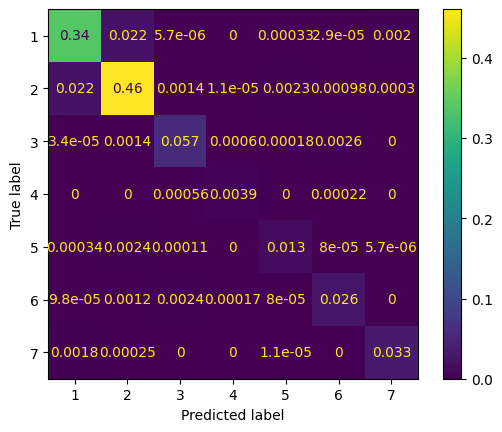

In [42]:
confusion_matrix_DT = metrics.confusion_matrix(y_test, predictions_DT)
print("confusion_matrix_DT", confusion_matrix_DT)

import matplotlib.pyplot as plt
cm_display_DT = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_DT, display_labels = [1, 2, 3, 4, 5, 6, 7])
cm_display_DT.plot()

metrics.ConfusionMatrixDisplay.from_estimator(model_1, X_test, y_test, normalize='all')
plt.show()

for example here from labels 1 to 7, the model predicted class 2 better than others as normalized plot shows here. we can't state this result for unnormalized plots because they show the colors according to the relative frequency of each class, not in comparison of its prediction match with trues of itself. 

evaluating training data

    training data evaluation metrics

In [38]:
train_predictions_DT = model_1.predict(X_train)

print("train_Accuracy_DT:",  metrics.accuracy_score(y_train, train_predictions_DT),
      "train_precision_DT:", metrics.precision_score(y_train, train_predictions_DT, average=None),
      "train_recall_DT:",    metrics.recall_score(y_train, train_predictions_DT, average=None),
      "train_f1_score_DT",   metrics.f1_score(y_train, train_predictions_DT, average=None)
     )

train_Accuracy_DT: 1.0 train_precision_DT: [1. 1. 1. 1. 1. 1. 1.] train_recall_DT: [1. 1. 1. 1. 1. 1. 1.] train_f1_score_DT [1. 1. 1. 1. 1. 1. 1.]


if data components correlations be less than our estimation and standard, it may leads to a deep tree which can be overfitted, which means that it seems the model only has memorized each individual member of data and doesn't learn the possible relations which may appear in them for future applications; it is the happening that we can see here too.

    training data confusion matrix

train_confusion_matrix_DT [[148288      0      0      0      0      0      0]
 [     0 198310      0      0      0      0      0]
 [     0      0  25028      0      0      0      0]
 [     0      0      0   1923      0      0      0]
 [     0      0      0      0   6645      0      0]
 [     0      0      0      0      0  12157      0]
 [     0      0      0      0      0      0  14357]]


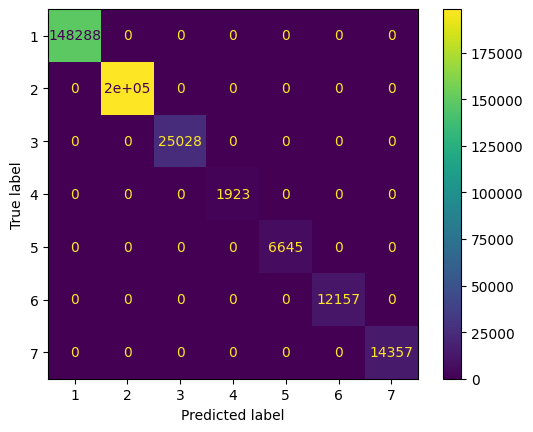

In [39]:
train_confusion_matrix_DT = metrics.confusion_matrix(y_train, train_predictions_DT)
print("train_confusion_matrix_DT", train_confusion_matrix_DT)

import matplotlib.pyplot as plt
t_cm_display_DT = metrics.ConfusionMatrixDisplay(confusion_matrix = train_confusion_matrix_DT, display_labels = [1, 2, 3, 4, 5, 6, 7])
t_cm_display_DT.plot()
plt.show()

creating a random forest model by fitting it on data

In [21]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=100)
model_2 = forest.fit(X_train, y_train)
predictions_RF = model_2.predict(X_test)

displaying examples of produced random forests

In [ ]:
"because of long during of running time in spite of considering only one decision tree of it here, it is converted to comment block."
#import matplotlib.pyplot as plt
#from sklearn.tree import plot_tree

#plot_tree(forest.estimators_[0], 
#          feature_names=X.columns, 
#          filled=True, rounded=True)

#plt.show()

evaluating random forest model and reporting its performance

    model evaluation metrics

In [25]:
from sklearn import metrics
print("Accuracy_RF:",  metrics.accuracy_score(y_test, predictions_RF),
      "precision_RF:", metrics.precision_score(y_test, predictions_RF, average=None),
      "recall_RF:",    metrics.recall_score(y_test, predictions_RF, average=None),
      "f1_score_RF",   metrics.f1_score(y_test, predictions_RF, average=None)
     )

Accuracy_RF: 0.9520722416008812 precision_RF: [0.96136323 0.94674583 0.93990319 0.92922674 0.95086957 0.9331992
 0.97467718] recall_RF: [0.93965572 0.97182055 0.95944434 0.86043689 0.7679073  0.89021113
 0.94457988] f1_score_RF [0.95038554 0.95911933 0.94957324 0.89350977 0.84965035 0.91119843
 0.95939254]


    model confusion matrix

confusion_matrix_RF [[59717  3677     1     0    19     6   132]
 [ 2032 82596   184     0    79    81    19]
 [    3   176 10291    36     9   211     0]
 [    0     0    94   709     0    21     0]
 [   38   581    29     0  2187    13     0]
 [   14   184   350    18     6  4638     0]
 [  313    28     0     0     0     0  5812]]


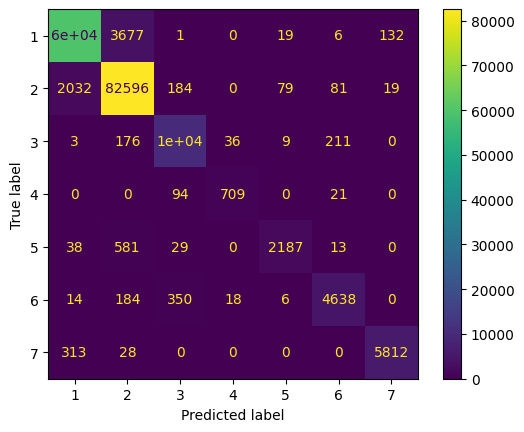

In [27]:
confusion_matrix_RF = metrics.confusion_matrix(y_test, predictions_RF)
print("confusion_matrix_RF", confusion_matrix_RF)

import matplotlib.pyplot as plt
cm_display_RF = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_RF, display_labels = [1, 2, 3, 4, 5, 6, 7])
cm_display_RF.plot()
plt.show()

evaluating training data

    training data evaluation metrics

In [29]:
train_predictions_RF = model_2.predict(X_train)

print("train_Accuracy_RF:",  metrics.accuracy_score(y_train, train_predictions_RF),
      "train_precision_RF:", metrics.precision_score(y_train, train_predictions_RF, average=None),
      "train_recall_RF:",    metrics.recall_score(y_train, train_predictions_RF, average=None),
      "train_f1_score_RF",   metrics.f1_score(y_train, train_predictions_RF, average=None)
     )

train_Accuracy_RF: 1.0 train_precision_RF: [1. 1. 1. 1. 1. 1. 1.] train_recall_RF: [1. 1. 1. 1. 1. 1. 1.] train_f1_score_RF [1. 1. 1. 1. 1. 1. 1.]


    training data confusion matrix

train_confusion_matrix_RF [[148288      0      0      0      0      0      0]
 [     0 198310      0      0      0      0      0]
 [     0      0  25028      0      0      0      0]
 [     0      0      0   1923      0      0      0]
 [     0      0      0      0   6645      0      0]
 [     0      0      0      0      0  12157      0]
 [     0      0      0      0      0      0  14357]]


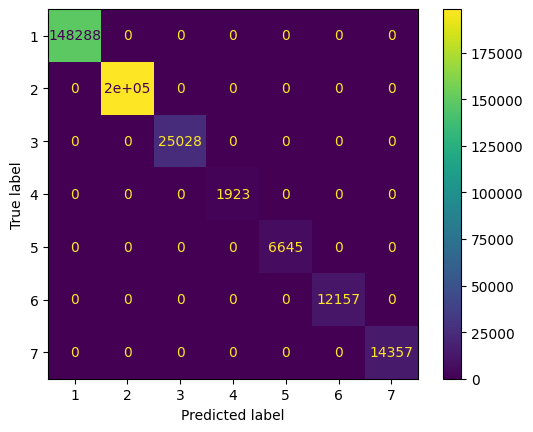

In [31]:
train_confusion_matrix_RF = metrics.confusion_matrix(y_train, train_predictions_RF)
print("train_confusion_matrix_RF", train_confusion_matrix_RF)

import matplotlib.pyplot as plt
t_cm_display_RF = metrics.ConfusionMatrixDisplay(confusion_matrix = train_confusion_matrix_RF, display_labels = [1, 2, 3, 4, 5, 6, 7])
t_cm_display_RF.plot()
plt.show()